In [1]:
%matplotlib inline
# Load the "autoreload" extension
%load_ext autoreload
# always reload modules
%autoreload 2
# black formatter for jupyter notebooks
# %load_ext nb_black
# black formatter for jupyter lab
%load_ext lab_black

%run ../../src/notebook_env.py


---------------------------------
Working on the host: imarevic-pc

---------------------------------
Python version: 3.10.12 (main, May 27 2025, 17:12:29) [GCC 11.4.0]

---------------------------------
Python interpreter: /home/imarevic/Documents/teaching/SRH/content/statistik/statistik-env/bin/python3


# Logistische Regression

In [2]:
import math
import folium
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import statsmodels.api as sm

Die <a href="https://de.wikipedia.org/wiki/Logistische_Regression">logistische Regression</a>, auch bekannt als **Logit-Regression** oder **Logit-Modell**, ist ein probabilistisches lineares Modell für dichotome Daten. Die Antwortvariable ist eine binäre Variable (Nominalvariable), d. h. die Variable hat zwei Kategorien oder zwei Werte: Wahr vs. Falsch oder $1$ vs. $0$ oder Erfolg vs. Misserfolg, mit den Wahrscheinlichkeiten $\pi$ bzw. $1-\pi$. Somit folgt die Antwortvariable einer Binomialverteilung, die wie folgt geschrieben wird

$$y \sim B(\eta,\pi)\text{,} $$

wobei $\eta$ der binomische Nenner ist, der für eine binäre Variable $0$ oder $1$ ist, und $\pi$ die Erfolgswahrscheinlichkeit ist.

## Die Logit-Funktion

Das Ergebnis einer logistischen Regression ist eine Wahrscheinlichkeit ($\pi$), also ein Wert zwischen $0$ und $1$. Außerdem ist dieses Ergebnis eine lineare Funktion bekannter Kovariaten $x_i$, was nur ein anderes Wort für die Beobachtungen in unserem Datensatz ist. 

$$\pi =\beta_0+ \beta_1x_1+ \beta_2x_2+ ... +\beta_kx_k$$

Für ein einfaches logistisches Regressionsmodell mit einer Vorhersagevariablen vereinfacht sich die obige Gleichung zu

$$\pi = \beta_0+ \beta_1x_1\text{.}$$

Der rechte Term der Gleichung kann jedoch jeden reellen Wert annehmen, während der linke Term der Gleichung eine Wahrscheinlichkeit auf der Skala von $0$ bis $1$ ist. Um die Skala der Daten (rechter Term) in eine Wahrscheinlichkeit zwischen $0$ und $1$ abzubilden wenden wir eine so genannte **Verknüpfungsfunktion** an.

Für das logistische Regressionsmodell ist diese Verknüpfungsfunktion die <a href="https://de.wikipedia.org/wiki/Logit">Logit-Funktion</a>. Die Logit-Funktion bildet Wahrscheinlichkeiten aus dem Bereich ($0,1$)
auf den gesamten reellen Zahlenbereich ($-\infty,\infty$). Sie wird geschrieben als

$$\eta = logit(\pi)\text{,}$$

wobei $\pi$ die Wahrscheinlichkeit ist.

Um den Logit zu verstehen, führen wir zunächst die <a href="https://de.wikipedia.org/wiki/Chance_(Stochastik)">Chance</a> oder kurz **Odds** ein. Die Odds ($o$) können geschrieben werden als

$$o = \frac{\pi}{1-\pi}\text{,}$$

wobei $\pi$ die Wahrscheinlichkeit ist, dass ein Ereignis eintritt. Wenn die Wahrscheinlichkeit eines Ereignisses $0,5$ beträgt, ist die Wahrscheinlichkeit eins zu eins oder gerade $\left(\frac{0.5}{1-0.5}=1\right)$. Wenn die Wahrscheinlichkeit $1/3$ beträgt, ist die Wahrscheinlichkeit eins zu zwei $\left(\frac{1/3}{1-1/3}=1/2\right)$. Die Odds können jeden positiven Wert annehmen und unterliegen daher keiner Beschränkung nach oben $[0 \ $,$ \ \infty[$. Daher definieren wir weiter die **Log-Odds**, die der Logarithmus der Odds ist: 

$$\eta = logit(\pi) = log \left( \frac{\pi}{1-\pi}\right)$$

Diese logarithmische Funktion bewirkt, dass die Beschränkung der Untergrenze aufgehoben wird, so dass die Funktion, die <a href="https://de.wikipedia.org/wiki/Logit">Logit-Funktion</a>, unsere Verknüpfungsfunktion, Werte im Bereich von $0$ bis $1$ in Werte über den gesamten realen Zahlenbereich $]-\infty \ $,$ \ +\infty[$ umwandelt. Wenn die Wahrscheinlichkeit $1/2$ beträgt sind die Odds gerade und der Logit ist Null. Negative Logits stehen für Wahrscheinlichkeiten unter der Hälfte und positive Logits für Wahrscheinlichkeiten über der Hälfte.

Die umgekehrte Form der Logitfunktion wird auch als <a href="https://de.wikipedia.org/wiki/Logistische_Funktion">logistische Funktion</a> bezeichnet, die aufgrund ihrer charakteristischen $S$-Form manchmal einfach als **<a href="https://de.wikipedia.org/wiki/Sigmoidfunktion">Sigmoidfunktion</a>** abgekürzt wird. Sie ermöglicht es uns, von Logits auf Wahrscheinlichkeiten umzuschalten.

$$\pi = logit^{-1}(\eta) = \frac{e^{\eta}}{1+e^{\eta}} = \frac{1}{1+e^{-\eta}} = \frac{1}{1+e^{-(\beta_0+ \beta_1x_1+ \beta_2x_2+ ... +\beta_kx_k)}}$$

Die logistische Funktion für das Intervall $[-6 \ $,$ \ 6]$ ist unten dargestellt. Für Werte von $\eta$ im Bereich von $-\infty$ bis $\infty$ liegt $\pi$ im Bereich von $0$ bis $1$.

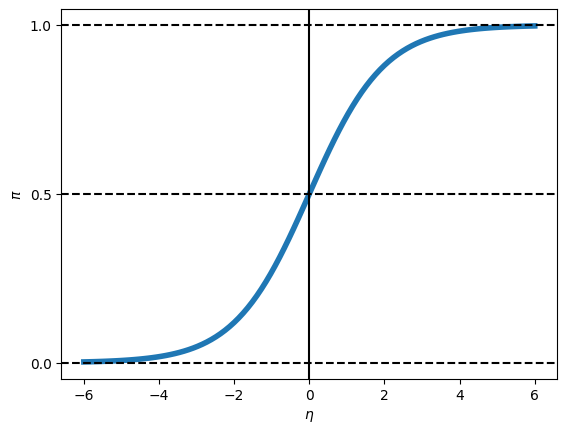

In [3]:
import matplotlib.pyplot as plt
import numpy as np

fig, ax = plt.subplots()
x = np.linspace(-6, 6, 100)
z = 1 / (1 + np.exp(-x))
ax.plot(x, z, linewidth=4)

ax.set_yticks([0, 0.5, 1])
ax.set_xlabel("$\eta$")
ax.set_ylabel("$\pi$")
ax.axvline(0, color="k")
for _y in [0, 0.5, 1]:
    ax.axhline(_y, color="k", linestyle="--")

## Das logistische Regressionsmodell

Die Logit-Funktion bildet Wahrscheinlichkeiten auf Werte über den gesamten realen Zahlenbereich ab. Die Wahrscheinlichkeit, dass ein Ereignis/Ergebnis/Erfolg wahr ist ($y=1$), wenn die Menge der unabhängigen Variablen $x_i$, unsere Daten, gegeben ist, wird also geschrieben als

$$logit(P(y=1|x_i)) = \beta_0+ \beta_1x_1+ \beta_2x_2 + ... + \beta_kx_k\text{,}$$

Der Einfachheit halber drücken wir das Inverse der obigen Funktion wie folgt aus

$$\phi(\eta) = \frac{1}{1+e^{-\eta}}\text{,}$$

wobei $\eta$ die Linearkombination von Koeffizienten ($\beta_i$) und unabhängiger Variablen ($x_i$) ist, berechnet als $\eta = \beta_0 + \beta_1x_1 + \beta_2x_2 + ... + \beta_kx_k$.

Die Parameter ($\beta_i$) des Logit-Modells werden nach der <a href="https://de.wikipedia.org/wiki/Maximum-Likelihood-Methode">Methode der maximalen Wahrscheinlichkeit</a> geschätzt. Es gibt jedoch keine geschlossene Lösung, so dass die Maximum-Likelihood-Schätzungen u. a. durch iterative Algorithmen wie <a href="https://de.wikipedia.org/wiki/Newtonverfahren">Newton-Raphson</a>, iterativ neu gewichtete kleinste Quadrate oder <a href="https://de.wikipedia.org/wiki/Gradientenverfahren">Gradientenverfahren</a> ermittelt werden.

Das Ergebnis der Sigmoidfunktion wird als die Wahrscheinlichkeit interpretiert, dass eine bestimmte Beobachtung zur Klasse $1$ gehört. Sie wird geschrieben als $\phi(\eta)=P(y=1|x_i,\beta_i)$, die Erfolgswahrscheinlichkeit ($y=1$) bei den durch die Koeffizienten $\beta_i$ parametrisierten Prädiktorvariablen $x_i$. Wenn wir beispielsweise für eine bestimmte Beobachtung $\phi(\eta)=0,65$ berechnen, bedeutet dies, dass die Wahrscheinlichkeit, dass diese Beobachtung zur Klasse $1$ gehört, $65 \%$ beträgt. In ähnlicher Weise wird die Wahrscheinlichkeit, dass diese Beobachtung zu Klasse $2$ gehört, berechnet als $$\phi(\eta) = P(y=0|x_i,\beta_i) = 1 - P(y=1|x_i,\beta_i) = 1 - 0,65=0,35$$ oder $35 \%$. Für die Klassenzuordnung wird die vorhergesagte Wahrscheinlichkeit dann über eine Einheitssprungfunktion in ein binäres Ergebnis umgewandelt:

$$
\hat{y} =
\begin{cases}
1,  & \text{wenn $\phi(\eta) \ge$ 0,5} \\
0, & \text{sonst}
\end{cases}$$

## Logistische Regression in Python - ein Beispiel

Die logistische Regressionsanalyse gehört zur Klasse der <a href="https://de.wikipedia.org/wiki/Verallgemeinerte_lineare_Modelle">verallgemeinerten linearen Modelle</a>. In Python werden verallgemeinerte lineare Modelle mit der Funktion `GLM()` verarbeitet. Die Funktion wird als `GLM(y=Antwort, X=Prädiktor, family=sm.families.Binomial())` geschrieben. Bitte beachten Sie, dass `logit` die Vorgabe für binomial ist; wir müssen es also nicht explizit eingeben. Die Funktion `GLM()` gibt ein Modellobjekt zurück, auf das wir Extraktormethoden wie `summary()`, `fitted()` oder `predict()` anwenden können. 

### Einführung und explorative Datenanalyse

Dieses Beispiel ist inspiriert von der Arbeit von <a href="https://myweb.fsu.edu/jelsner/_site/index.html">James B. Elsner</a> und seinen Kollegen (<a href="https://journals.ametsoc.org/view/journals/clim/9/11/1520-0442_1996_009_2880_ocoah_2_0_co_2.xml">Elsner et al. 1996</a> und <a href="https://journals.ametsoc.org/doi/10.1175/1520-0442-11.8.2062">Kimberlain und Elsner 1998</a>), die an der **Klassifizierung der nordatlantischen Hurrikane** auf der Grundlage von Entstehungs- und Entwicklungsmechanismen gearbeitet haben. Die Klassifizierung ergibt drei verschiedene Gruppen: tropische Wirbelstürme, Wirbelstürme unter baroklinem Einfluss und Wirbelstürme mit baroklinem Ursprung. Der Begriff "baroklin" bezieht sich auf die Tatsache, dass diese Hurrikane von Störungen der äußeren Tropen beeinflusst werden oder sogar in den äußeren Tropen entstehen. Die stärkeren tropischen Wirbelstürme entwickeln sich weiter südlich und treten hauptsächlich im August und September auf. Die schwächeren außertropischen Wirbelstürme treten während einer längeren Saison auf. Der ursprüngliche Datensatz zur objektiven Hurrikan-Klassifizierung kann <a href="https://myweb.fsu.edu/jelsner/temp/Data.html">hier</a> abgerufen werden. Die Analyse von James B. Elsner kann <a href="https://rpubs.com/jelsner/5206">hier</a> eingesehen werden.

**Ziel der Übung ist es, ein Modell zu erstellen, das die Gruppenzugehörigkeit eines Hurrikans, entweder tropisch oder aussertropisch, auf der Grundlage des Breitengrades seiner Entstehung vorhersagt.**

Wir beginnen die Analyse mit dem Laden des Datensatzes. Laden Sie die Daten auf Ihren Computer <a href="https://myweb.fsu.edu/jelsner/temp/Data.html">herunter</a> und öffnen Sie die Datei. Bitte beachten Sie, dass es sich bei der Datei um ein *Excel*-Tabelle handelt. Um mit *Excel*-Tabellen umgehen zu können benutzen wir `read_excel()` aus dem `Pandas` Paket.

In [4]:
hurricanes = pd.read_excel("../../data/hurricanes.xlsx", index_col=0)
hurricanes.head(5)

,Number,Name,Year,Type,FirstLat,FirstLon,MaxLat,MaxLon,LastLat,LastLon,MaxInt
RowNames,,,,,,,,,,,
1,430,NOTNAMED,1944,1,30.2,-76.1,32.1,-74.8,35.1,-69.2,80
2,432,NOTNAMED,1944,0,25.6,-74.9,31.0,-78.1,32.6,-78.2,80
3,433,NOTNAMED,1944,0,14.2,-65.2,16.6,-72.2,20.6,-88.5,105
4,436,NOTNAMED,1944,0,20.8,-58.0,26.3,-72.3,42.1,-71.5,120
5,437,NOTNAMED,1944,0,20.0,-84.2,20.6,-84.9,19.1,-93.9,70


Zunächst untersuchen wir die Struktur des Datensatzes, indem wir die Methode `info()` anwenden.

In [5]:
hurricanes.info()

<class 'pandas.core.frame.DataFrame'>
Index: 337 entries, 1 to 337
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Number    337 non-null    int64  
 1   Name      337 non-null    object 
 2   Year      337 non-null    int64  
 3   Type      337 non-null    int64  
 4   FirstLat  337 non-null    float64
 5   FirstLon  337 non-null    float64
 6   MaxLat    337 non-null    float64
 7   MaxLon    337 non-null    float64
 8   LastLat   337 non-null    float64
 9   LastLon   337 non-null    float64
 10  MaxInt    337 non-null    int64  
dtypes: float64(6), int64(4), object(1)
memory usage: 31.6+ KB


Der Datensatz besteht aus $337$ Beobachtungen und $12$ Variablen. Wir interessieren uns in erster Linie für die Variable `Type`, die unsere Antwortvariable ist, und für die Variable `FirstLat`, die dem Breitengrad der Entstehung entspricht und somit unsere Prädiktorvariable ist. Um jedoch ein Gefühl für den Datensatz zu bekommen, stellen wir die Anzahl der Hurrikane für jedes Jahr als Balkendiagramm mit dem `mathplotlib`-Paket dar.

<Axes: xlabel='Year'>

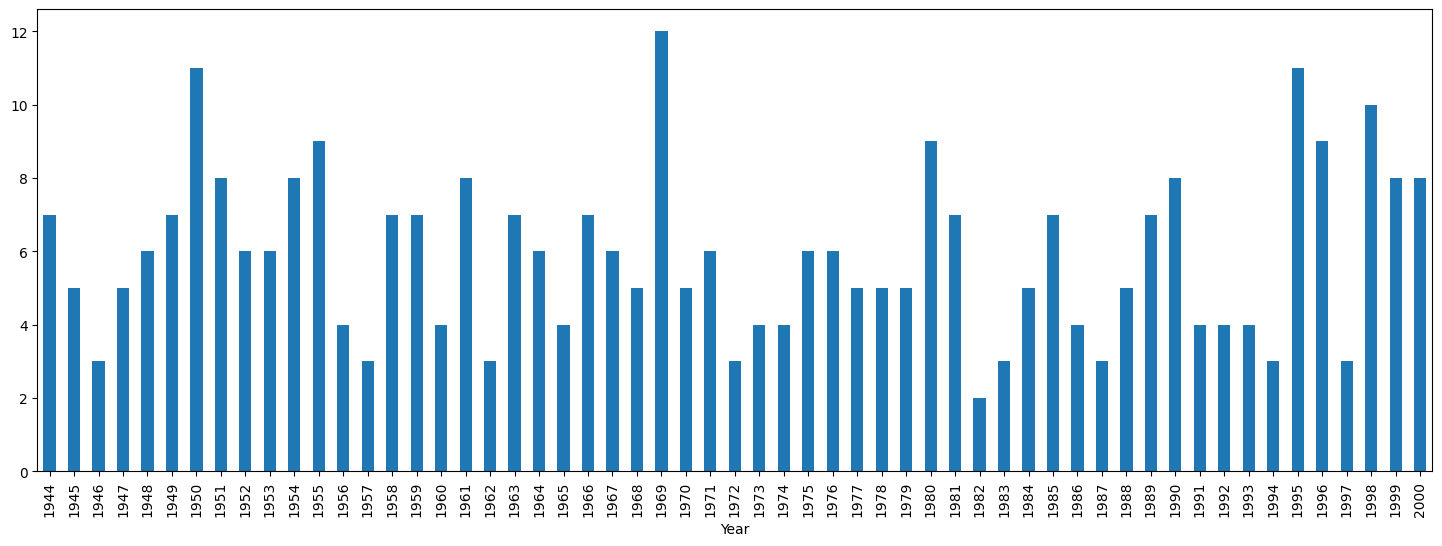

In [6]:
hurricanes["Year"].value_counts().sort_index().plot.bar(figsize=(18, 6))

Das ist eine schöne Darstellung. Indem wir den Datensatz umformen können wir die Balken zusätzlich entsprechend der Variable `Type` einfärben.

In [7]:
hurricane_types = (
    hurricanes.groupby("Type")["Year"].value_counts().unstack().transpose()
)
hurricane_types = hurricane_types.rename(
    columns={0: "Tropisch", 1: "Baroklinisch beeinflusst", 3: "Barokline Entstehung"}
)

<Axes: xlabel='Year'>

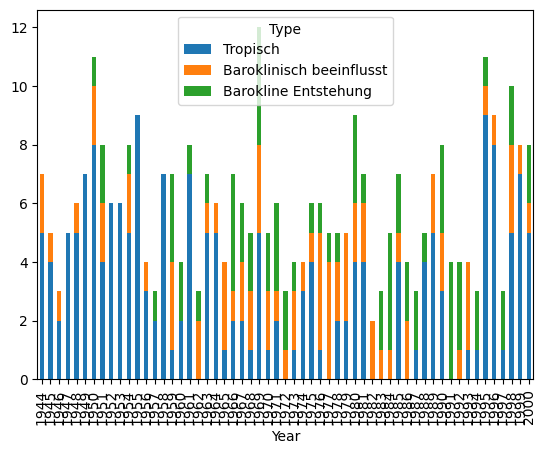

In [8]:
hurricane_types.plot.bar(stacked=True)

Für eine numerische Darstellung der Hurricane-Klassen verwenden wir die Methode `sum()`.

In [9]:
print(
    f"Klasse 0 (tropische Wirbelstürme) Hurrikans: {hurricane_types['Tropisch'].sum()}"
)
print(
    f"Klasse 1 (barokline Einflüsse) Hurrikans: {hurricane_types['Baroklinisch beeinflusst'].sum()}"
)
print(
    f"Klasse 3 (barokline Auslösung) Hurrikans: {hurricane_types['Barokline Entstehung'].sum()}"
)

Klasse 0 (tropische Wirbelstürme) Hurrikans: 187.0
Klasse 1 (barokline Einflüsse) Hurrikans: 77.0
Klasse 3 (barokline Auslösung) Hurrikans: 73.0


Für die **Klasse** $0$, *tropische Wirbelstürme*, gibt es $187$ Beobachtungen, für die **Klasse** $1$, *barokline Einflüsse*, gibt es $77$ Beobachtungen und für die **Klasse** $3$, *barokline Auslösung*, gibt es $73$ Beobachtungen. Bei der logistischen Regression haben wir es mit dichotomen Daten zu tun; der Einfachheit halber kodieren wir die Klassen neu und weisen der Klasse $1$ und der Klasse $3$, die beide von den äußeren Tropen beeinflusst werden, die Bezeichnung `aussertropisch` zu.

In [10]:
hurricanes["Origins"] = hurricanes["Type"].replace(
    {0: "tropisch", 1: "aussertropisch", 3: "aussertropisch"}
)

Wir haben nun eine binäre Antwortvariable mit zwei Klassen: Tropische und aussertropische Wirbelstürmen.

In [11]:
hurricanes["Origins"].value_counts()

Origins
tropisch          187
aussertropisch    150
Name: count, dtype: int64

Um diesen Teil der explorativen Datenanalyse abzuschließen, stellen wir die Daten auf einer interaktiven Karte dar, indem wir das `folium`-Paket verwenden.

In [12]:
hurricanes.head()

,Number,Name,Year,Type,FirstLat,FirstLon,MaxLat,MaxLon,LastLat,LastLon,MaxInt,Origins
RowNames,,,,,,,,,,,,
1,430,NOTNAMED,1944,1,30.2,-76.1,32.1,-74.8,35.1,-69.2,80,aussertropisch
2,432,NOTNAMED,1944,0,25.6,-74.9,31.0,-78.1,32.6,-78.2,80,tropisch
3,433,NOTNAMED,1944,0,14.2,-65.2,16.6,-72.2,20.6,-88.5,105,tropisch
4,436,NOTNAMED,1944,0,20.8,-58.0,26.3,-72.3,42.1,-71.5,120,tropisch
5,437,NOTNAMED,1944,0,20.0,-84.2,20.6,-84.9,19.1,-93.9,70,tropisch


In [13]:
# Create the map
hurricane_map = folium.Map(location=[25, -50], zoom_start=4)
# add marker one by one on the map
colors = {"aussertropisch": "green", "tropisch": "red"}
for row in hurricanes.itertuples():
    m = folium.Marker(
        location=[row.FirstLat, row.FirstLon], icon=folium.Icon(colors[row.Origins])
    )
    m.add_to(hurricane_map)
# Show the map
hurricane_map

### Logistische Regression: Modellanpassung

Erinnern Sie sich an das Ziel der Übung: Wir wollen ein Modell erstellen, das die Gruppenzugehörigkeit eines Hurrikans vorhersagt, entweder tropisch ($0$) oder aussertropisch ($1$), basierend auf dem Breitengrad der Entstehung des Hurrikans. Die Antwortvariable ist die binäre Variable `Origins` und die Prädiktorvariable ist `FirstLat`. Wir erstellen ein Logit-Modell, indem wir die Funktion `GLM()` anwenden. Für das logistische Regressionsmodell geben wir `family = sm.families.Binomial()` an. Statsmodel erwartet numerischen Inputvariablen, deshalb wandeln wir `tropisch` zu $0$ und `aussertropisch` zu $1$ um.

In [14]:
X = hurricanes["FirstLat"].values
X = sm.add_constant(X)
y = hurricanes["Origins"].replace({"tropisch": 0, "aussertropisch": 1}).values
log_model = sm.GLM(y, X, family=sm.families.Binomial()).fit()

/tmp/ipykernel_416826/101292342.py:3: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  y = hurricanes["Origins"].replace({"tropisch": 0, "aussertropisch": 1}).values


Wir verwenden die Extraktormethode `summary()`, um die Modelleigenschaften zu überprüfen.

In [15]:
log_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                      y   No. Observations:                  337
Model:                            GLM   Df Residuals:                      335
Model Family:                Binomial   Df Model:                            1
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -116.02
Date:                Thu, 13 Nov 2025   Deviance:                       232.03
Time:                        08:11:45   Pearson chi2:                     430.
No. Iterations:                     6   Pseudo R-squ. (CS):             0.4963
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -9.0826      0.961     -9.446      0.000     -10.967      -7.198
x1             0.3728      0.039      9.447      0.000       0.295       0.450
==============================================================================
"""

Schauen wir uns die Koeffizienten genauer an:

In [16]:
log_model.params

array([-9.08263355,  0.37282953])

Beachten Sie, dass die Ausgabe des logistischen Modells auf der Link-Skala (*logit*) erfolgt; die numerische Ausgabe des Modells entspricht also den **Log-Odds**! Der Einfachheit halber schreiben wir das logistische Regressionsmodell mit dem berechneten Achsenabschnitt und Koeffizienten auf.

$$\phi(\eta) = \frac{1}{1+e^{-\eta}}= \frac{1}{1+e^{-(\beta_0+\beta_1x)}}= \frac{1}{1+e^{-(-9,0826335+ 0,3728295x)}}$$

Konzentrieren wir uns zunächst auf den Koeffizienten des Achsenabschnitts. Der Koeffizient des Achsenabschnitts entspricht der logarithmischen Wahrscheinlichkeit der Beobachtung eines Hurrikans auf dem Breitengrad Null, der als Äquator bekannt ist. Um die Wahrscheinlichkeit der Beobachtung eines aussertropischen Hurrikans bei einem Breitengrad von Null zu berechnen, exponentzieren wir die log-odds $e^{-9,0826335} \approx 1,1362198\times 10^{-4}$. 

Dies ist eine sehr niedrige Zahl! Und sie macht durchaus Sinn, da es sehr unwahrscheinlich ist, einen aussertropischen Hurrikan am Äquator zu beobachten.

Der Koeffizient der Variable für die Bildungsbreite (`FirstLat`) hat einen numerischen Wert von $0,3728295$. Das positive Vorzeichen dieses Wertes zeigt an, dass die Wahrscheinlichkeit, einen außertropischen Wirbelsturm zu beobachten, mit dem Breitengrad zunimmt. Die Größe des Koeffizienten bedeutet, dass die Log-Odds für jedes Grad Zunahme der geografischen Breite im Durchschnitt um konstant $0,3728295$ Einheiten zunimmt. Wenn man den Koeffizientenwertes als Exponenten nimmt, erhält man das Odds Verhältnis.

In [17]:
math.exp(log_model.params[1])

1.451836826600862

In [18]:
log_model.params[1]

np.float64(0.3728295317136198)

Somit erhöht sich das Chancenverhältnis für jedes Grad Zunahme der Bildungsbreite im Durchschnitt um einen konstanten Faktor von $1,4518368$ (oder $45 \%$). Die Interpretation gilt nur für den Bereich der Breitengrade in den Daten und ist für Breitengrade außerhalb des Bereichs, in dem Hurrikane auftreten, physikalisch bedeutungslos.

Die obige Koeffiziententabelle enthält einen Standardfehler und den $p$-Wert. Je kleiner der $p$-Wert ist, desto geringer ist die Unterstützung für die Nullhypothese angesichts der Daten und des Modells. Zur Erinnerung: Die Nullhypothese besagt, dass der Koeffizient gleich $0$ ist,
mit anderen Worten, die Nullhypothese besagt, dass es keinen Zusammenhang zwischen dem Auftreten eines nichttropischen Hurrikans und der Entstehungsbreite gibt. Der sehr kleine $p$-Wert stützt die Nullhypothese nicht und erlaubt uns, das Modell zu akzeptieren.

Wir haben gelernt, dass jede Punktschätzung von einem Konfidenzniveau bezüglich dieser Punktschätzung begleitet sein sollte. Daher konstruieren wir ein $95 \%$-Konfidenzintervall für den geschätzten Modellkoeffizienten. Wir exponentzieren das Ergebnis, um das Odds-Ratio zu erhalten, eine Größe, die leichter zu interpretieren ist als die Log-Odds.

In [19]:
lci = log_model.conf_int()[1][0]
uci = log_model.conf_int()[1][1]

In [20]:
print(f"2,5%:  {round(lci,4)}")
print(f"97,5%: {round(uci,4)}")

2,5%:  0.2955
97,5%: 0.4502


In [21]:
print(f"2,5%:  {round(math.exp(lci),4)}")
print(f"97,5%: {round(math.exp(uci),4)}")

2,5%:  1.3438
97,5%: 1.5686


Wir können also mit $95 \%$iger Sicherheit sagen, dass für jedes Grad Zunahme der geographischen Breite die Beobachtung eines aussertropischen Hurrikans im Durchschnitt zwischen $34$ und $57 \%$ wahrscheinlicher wird. Macht Sinn, oder? In anderen Worten je weiter nördlich Wirbestürme entstehen, umso eher is dieser aussertropischen Einflüssen unterworfen. 

### Logistische Regression: Modellvorhersage

Im vorangegangenen Abschnitt haben wir ein logistisches Regressionsmodell für die Beziehung zwischen der Entstehungsbreite und der Art des Hurrikans (tropisch/aussertropisch) erstellt. In diesem Abschnitt wenden wir dieses Modell an, um Vorhersagen über die Wahrscheinlichkeit der Beobachtung eines aussertropischen Hurrikans in Abhängigkeit von der Entstehungsbreite zu machen.

Um die Wahrscheinlichkeit vorherzusagen, dass ein zufällig ausgewählter Hurrikan, der sich auf einem bestimmten Breitengrad bildet, vom Typ aussertropisch ist, wenden wir die Funktion `predict()` an. Berechnen wir die Wahrscheinlichkeit, einen aussertropischen Hurrikan zu beobachten, der sich bei folgenden Breitengraden gebildet hat : $10^\circ, 23,5^\circ \text{und }30^\circ$

In [22]:
pred = [10.0, 23.5, 30.0]  #
pred = sm.add_constant(pred)
predictions = log_model.get_prediction(exog=pred).summary_frame()
predictions

,mean,mean_se,mean_ci_lower,mean_ci_upper
0,0.004705,0.002701,0.001524,0.01443
1,0.420398,0.040645,0.343423,0.50145
2,0.891122,0.028045,0.822841,0.93516


Die Ergebnisse machen durchaus Sinn. Mit zunehmender geografischer Breite nimmt die Wahrscheinlichkeit, die Bildung eines nichttropischen Hurrikans zu beobachten, deutlich zu. Bei einem Breitengrad von $10^\circ$ beträgt die Wahrscheinlichkeit der Beobachtung eines außertropischen Hurrikans $0,005$, während sie bei einem Breitengrad von $30^\circ \  0,891$ beträgt.

Zum besseren Verständnis wollen wir die Wahrscheinlichkeit der Beobachtung eines nichttropischen Hurrikans, der sich bei einem Breitengrad von $23,5^\circ$
von Hand. Erinnern wir uns an die Gleichung für das Regressionsmodell von oben:


$\phi(\eta) = \frac{1}{1+e^{-\eta}} = \frac{1}{1+e^{-(\beta_0+\beta_1x_1)}}$

$ = \frac{1}{1+e^{-(-9,0826335+ 0,3728295 \times 23,5)}}$

$ =\frac{1}{1+e^{-(-0,3211396)}} $

$ = \frac{1}{2,378698}  = 0,4203981 $

Zur Veranschaulichung unserer Ergebnisse erstellen wir ein Diagramm der Vorhersagen über eine Reihe von Breitengraden. Dazu erstellen wir zunächst einen Vektor der Breitengrade, `lats`. Wir geben eine Schrittweite von $0,1$ Grad an, damit die resultierende Vorhersagekurve glatt ist. Wir wenden die Funktion `predict()` an und verwenden die Methode `get_prediction()`, um den **Standardfehler** der Vorhersage zu erhalten. Die Kenntnis des Standardfehlers ermöglicht die Berechnung der **Fehlermarge** und damit des **Konfidenzintervalls**. Mit der Methode `summary_frame()` können wir die Werte in einem Dataframe ausgeben und darauf zugreifen. Schließlich zeichnen wir die Datenpunkte (Beobachtungen) bei $0$ und $1$ ein.

/tmp/ipykernel_416826/345546926.py:4: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  y = hurricanes["Origins"].replace({"tropisch": 0, "aussertropisch": 1}).values


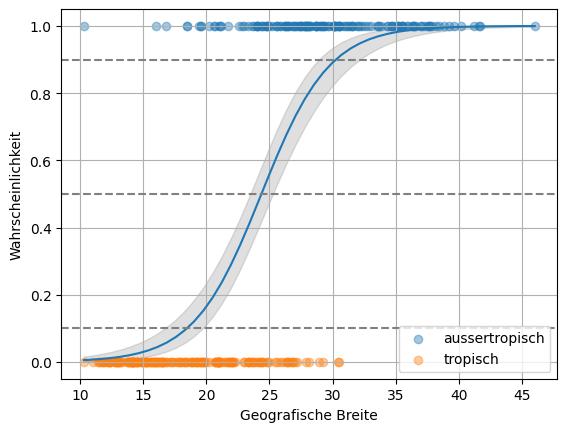

In [23]:
# Berechne Vorhersagen für lats
X = hurricanes["FirstLat"].values
X = sm.add_constant(X)
y = hurricanes["Origins"].replace({"tropisch": 0, "aussertropisch": 1}).values

lats_grid = np.linspace(min(hurricanes["FirstLat"]), max(hurricanes["FirstLat"]))


log_model = sm.GLM(y, X, family=sm.families.Binomial()).fit()
predictions = log_model.get_prediction(exog=sm.add_constant(lats_grid)).summary_frame()

# Ploting
fig, ax = plt.subplots()
ax.plot(lats_grid, predictions["mean"])
ax.fill_between(
    lats_grid,
    predictions["mean_ci_lower"],
    predictions["mean_ci_upper"],
    color="grey",
    alpha=0.25,
)
outer = hurricanes.loc[hurricanes.Origins == "aussertropisch", "FirstLat"].values
ax.scatter(outer, np.repeat(1, repeats=len(outer)), label="aussertropisch", alpha=0.4)
tropical = hurricanes.loc[hurricanes.Origins == "tropisch", "FirstLat"].values
ax.scatter(tropical, np.repeat(0, repeats=len(tropical)), label="tropisch", alpha=0.4)

ax.grid()
for _y in [0.1, 0.5, 0.9]:
    ax.axhline(y=_y, color="gray", linestyle="dashed")
ax.set_xlabel("Geografische Breite")
ax.set_ylabel("Wahrscheinlichkeit")
ax.legend()

Die Beobachtungen tropischer und aussertropischer Hurrikane sind entlang der Linien $y=0$ bzw. $y=1$ Linien dargestellt. Das graue Band ist das $95 \%$ige punktweise Konfidenzintervall.

Die Modellvorhersagen zeigen, dass die Wahrscheinlichkeit eines nichttropischen Hurrikans bei Breitengraden südlich von $20^\circ N$ weniger als $10 \%$ beträgt. Bis zum Breitengrad $26^\circ N$ übersteigt die Wahrscheinlichkeit jedoch $50 \%$ und bis zum Breitengrad $33^\circ N$ übersteigt die Wahrscheinlichkeit $90 \%$. Das Chancenverhältnis ist konstant, aber die Wahrscheinlichkeit ist eine nichtlineare Funktion des Breitengrads.